In [18]:
import cv2
import numpy as np

## Reading an images

In [19]:
# img = cv2.imread("Images/road.jpg",0) # if we use 0 then img convert into gray scale
img = cv2.imread("Images/road.jpg")
img = cv2.resize(src=img, dsize=(700,500)) # width=700, height=500
# show image
cv2.imshow("Road", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

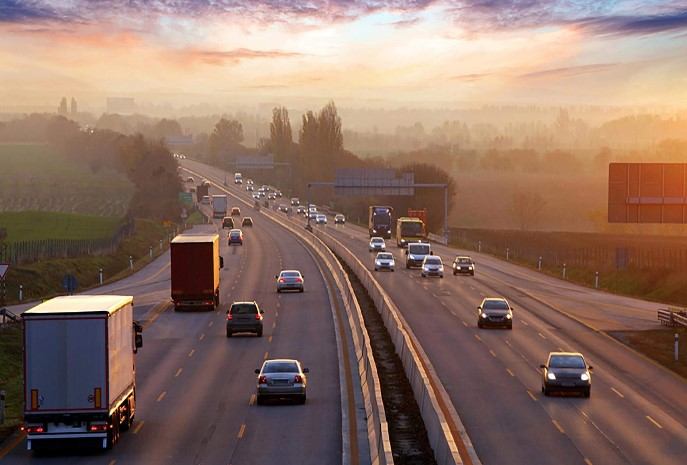

In [20]:
# check the shape

img.shape

(500, 700, 3)

In [21]:
# Extracting the height and width of an image

height , width = img.shape[0:2]

print("The height is: ",height)
print("The width is: ",width)

The height is:  500
The width is:  700


### Extracting the RGB values of a pixel

Now we will focus on extracting the RGB values of an individual pixel.
Note – OpenCV arranges the channels in BGR order. So the 0th value will correspond to Blue pixel and not Red.

In [22]:
# Here we have randomly chosen a pixel by passing in 100, 100 for height and width.
(B, G, R) = img[100,100]
# displaying the pixel values
print("Rad= {}, Green= {}, Blue= {}".format(R, G, B))

# We can also pass the channel to extract the value for a specific channel

B = img[100, 100, 0]
print("B = {}".format(B))

Rad= 230, Green= 197, Blue= 156
B = 156


## Extracting the Region of Interest (ROI)

In [23]:
# We will calculate the region of interest by slicing the pixels of the image

roi = img[100:500, 200:700]
roi

array([[[177, 207, 232],
        [177, 207, 232],
        [177, 207, 232],
        ...,
        [164, 219, 250],
        [164, 219, 250],
        [164, 219, 250]],

       [[176, 206, 231],
        [177, 207, 232],
        [177, 207, 232],
        ...,
        [164, 219, 250],
        [164, 219, 250],
        [164, 219, 250]],

       [[178, 208, 233],
        [178, 208, 233],
        [178, 208, 233],
        ...,
        [162, 217, 248],
        [162, 217, 248],
        [162, 217, 248]],

       ...,

       [[ 70,  61,  74],
        [ 69,  61,  72],
        [ 69,  61,  72],
        ...,
        [ 70,  88, 129],
        [ 75,  91, 137],
        [ 77,  93, 140]],

       [[ 69,  60,  73],
        [ 69,  61,  72],
        [ 69,  61,  72],
        ...,
        [ 69,  87, 128],
        [ 73,  89, 135],
        [ 72,  88, 135]],

       [[ 69,  60,  73],
        [ 70,  60,  72],
        [ 70,  60,  72],
        ...,
        [ 71,  90, 128],
        [ 73,  91, 132],
        [ 71,  88, 131]]

In [24]:
cv2.imshow("myimg", roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
# Calculating the ratio
ratio = 800 / width
  
# Creating a tuple containing width and height
dim = (800, int(height * ratio))
  
# Resizing the image
resize_aspect = cv2.resize(img, dim)
cv2.imshow("myimg", resize_aspect)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Rotating the Image

There are a lot of steps involved in rotating an image. So, let me explain each of them in detail.

The 2 main functions used here are –

1) getRotationMatrix2D()
2) warpAffine()

1) getRotationMatrix2D(): It takes 3 arguments –

i) center – The center coordinates of the image
ii) Angle – The angle (in degrees) by which the image should be rotated
iii) Scale – The scaling factor
 

<b> It returns a 2*3 matrix consisting of values derived from alpha and beta </b>

1) alpha = scale * cos(angle)

2) beta = scale * sine(angle)

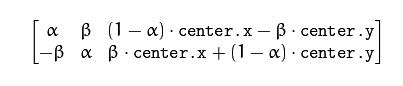

<b>warpAffine()</b>



The function warpAffine transforms the source image using the rotation matrix:

<b>dst(x, y) = src(M11X + M12Y + M13, M21X + M22Y + M23)</b>

Here M is the rotation matrix, described above.

It calculates new x, y co-ordinates of the image and transforms it.

In [26]:
# Calculating the center of the image
center = (width//2, height//2)

# Generating a rotation matrix
matrix = cv2.getRotationMatrix2D(center=center, angle= -45, scale= 1.0)

# Performing the affine transformation
rotated = cv2.warpAffine(src= img, M= matrix, dsize=(width, height))
cv2.imshow("Rotated Img", rotated)
cv2.waitKey(0)
cv2.destroyAllWindows()

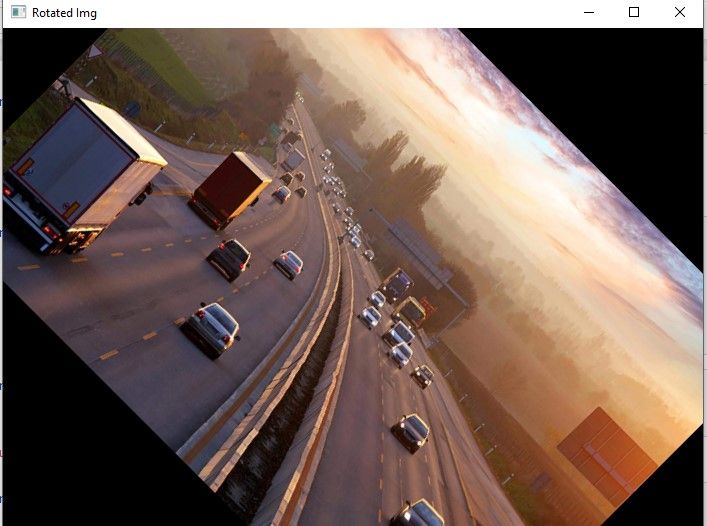

## Drawing a Rectangle

In [27]:
# We are copying the original image, as it is an in-place operation.
output = img.copy()
  
# Using the rectangle() function to create a rectangle.

rectangle = cv2.rectangle(output, (200, 300), 
                          (300, 400), (255, 0, 0), 2)

cv2.imshow("rectangle Img", rectangle)
cv2.waitKey(0)
cv2.destroyAllWindows()

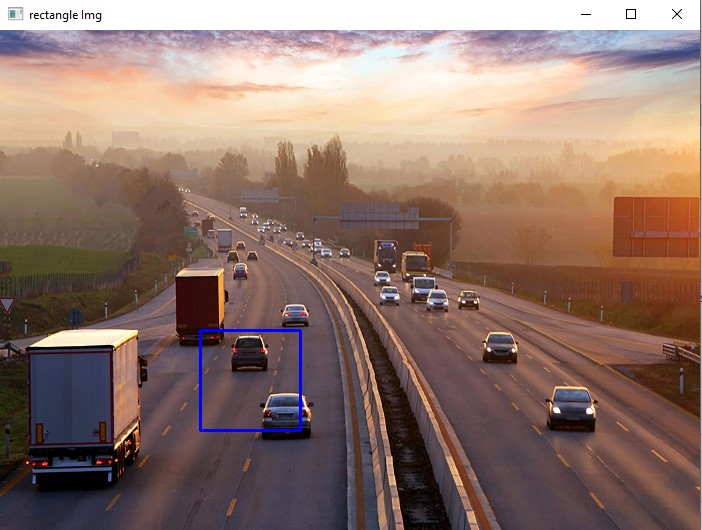

## To save an image use cv2.imwrite() function

### Arithmetic Operations on Images using OpenCV | Set-1 (Addition and Subtraction)

In [28]:
img1 = cv2.imread("Images/first.jpg")
img2 = cv2.imread("Images/second.jpg")

addUp = cv2.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.4, gamma=0)

cv2.imshow("addUp img", addUp)

# De-allocate any associated memory usage  
if cv2.waitKey(0) & 0xff == 27: 
    cv2.destroyAllWindows() 

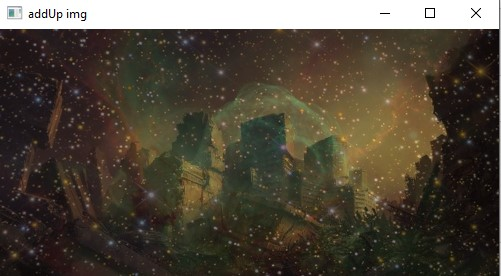

In [29]:
addUp2 = cv2.add(src1=img1, src2=img2)

cv2.imshow("addUp2 img", addUp2)

# De-allocate any associated memory usage  
if cv2.waitKey(0) & 0xff == 27: 
    cv2.destroyAllWindows() 

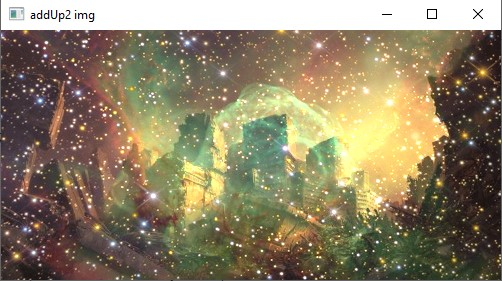

## Subtraction of Image

In [30]:
image1 = cv2.imread("Images/star-1.jpg")
image2 = cv2.imread("Images/dot.jpg")

sub = cv2.subtract(src1=image1, src2=image2)

cv2.imshow("Subtract img", sub)

# De-allocate any associated memory usage  
if cv2.waitKey(0) & 0xff == 27: 
    cv2.destroyAllWindows()

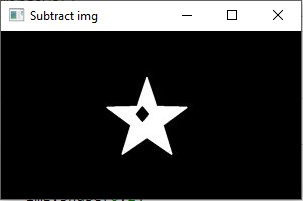

## Bitwise AND operation on Image

In [31]:
image1 = cv2.imread("Images/1bit1.png")
image2 = cv2.imread("Images/2bit2.png")

Bit_wise_and = cv2.bitwise_and(src1=image1, src2=image2, mask=None)

cv2.imshow("Bit_wise_and img", Bit_wise_and)

# De-allocate any associated memory usage  
if cv2.waitKey(0) & 0xff == 27: 
    cv2.destroyAllWindows()

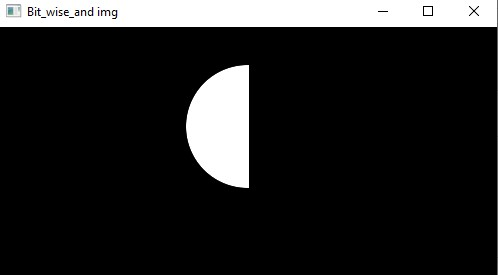

## Bitwise OR operation on Image

In [32]:
image1 = cv2.imread("Images/1bit1.png")
image2 = cv2.imread("Images/2bit2.png")

Bit_wise_OR = cv2.bitwise_or(src1=image1, src2=image2, mask=None)

cv2.imshow("Bit_wise_or img", Bit_wise_OR)

# De-allocate any associated memory usage  
if cv2.waitKey(0) & 0xff == 27: 
    cv2.destroyAllWindows()

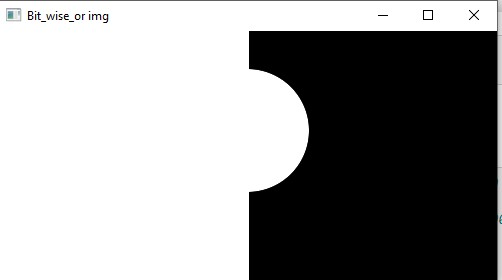

## Bitwise XOR operation on Image

In [33]:
image1 = cv2.imread("Images/1bit1.png")
image2 = cv2.imread("Images/2bit2.png")

Bit_wise_XOR = cv2.bitwise_xor(src1=image1, src2=image2, mask=None)

cv2.imshow("Bit_wise_XOR img", Bit_wise_XOR)

# De-allocate any associated memory usage  
if cv2.waitKey(0) & 0xff == 27: 
    cv2.destroyAllWindows()

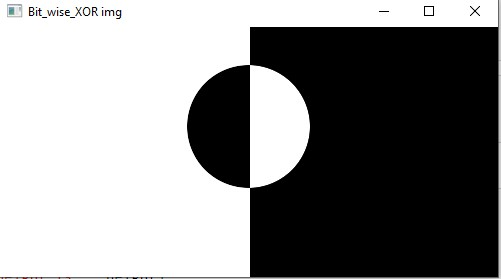

## Bitwise NOT operation on Image

In [34]:
image1 = cv2.imread("Images/1bit1.png")
image2 = cv2.imread("Images/2bit2.png")
 
# cv2.bitwise_not is applied over the
# image input with applied parameters
dest_not1 = cv2.bitwise_not(image1, mask = None)
dest_not2 = cv2.bitwise_not(image2, mask = None)
 
# the windows showing output image
# with the Bitwise NOT operation
# on the 1st and 2nd input image
cv2.imshow('Bitwise NOT on image 1', dest_not1)
cv2.imshow('Bitwise NOT on image 2', dest_not2)
  
# De-allocate any associated memory usage 
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

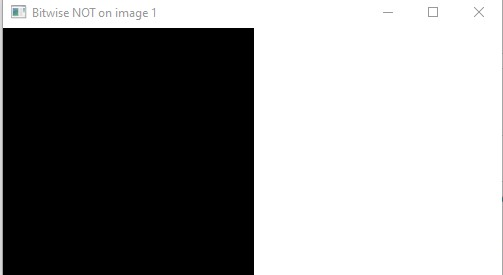

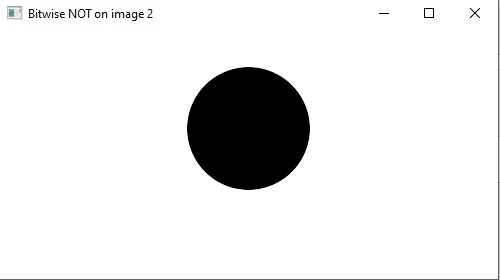